In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Desktop/ML/datasets_851_1557_reported.csv')
df

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


In [3]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

house.theft             15
vehicle.theft            7
out.of.vehicle.theft    15
shop.theft              15
narcotics                4
dtype: int64


In [4]:
df = df.dropna(axis = 0)
df.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
15,1965,5801,5090,167,3,151,51,8,3694,1042,...,397.0,717.0,123.0,12,431,297,711,10.0,213,7734000
16,1966,6063,5263,184,3,166,48,8,3736,1031,...,350.0,641.0,168.0,14,529,287,800,13.0,218,7808000
17,1967,6421,5555,189,2,173,49,8,3939,1086,...,384.0,639.0,204.0,13,548,314,867,51.0,229,7868000
18,1968,7166,6242,228,1,212,47,8,4240,1232,...,396.0,628.0,291.0,15,801,364,924,101.0,201,7914000
19,1969,7671,6036,241,1,223,42,8,4142,1131,...,384.0,574.0,255.0,16,681,376,1635,552.0,231,7968000


### 11.Fraud

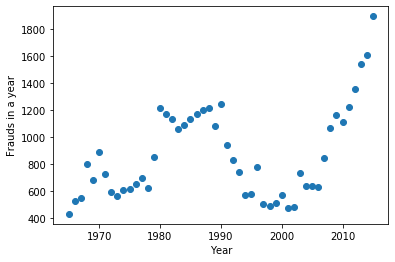

In [5]:
x = df[['Year']]
y = df[['fraud']]

#scatter plot of the data

#scatter plot of the data

plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Frauds in a year')
plt.show()



### `Linear regression analysis

Testing data: -0.30771257139452723
Training data: 0.15999825754127772


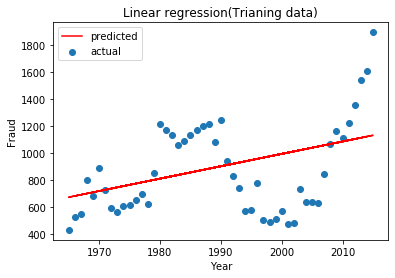

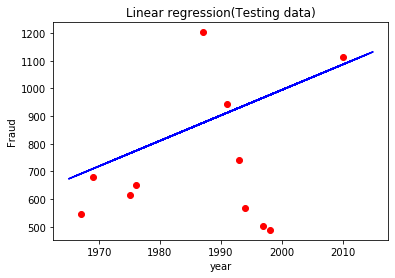

In [6]:
#using linear model to fit the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
a = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))
plt.scatter(x,y,label='actual')
plt.plot(x_train,reg.predict(x_train),c='red',label="predicted")
plt.title('Linear regression(Trianing data)')
plt.xlabel('Year')
plt.ylabel('Fraud')
plt.legend()
plt.show()
#visualize the test data set
plt.scatter(x_test,y_test,c="r")#x_test = prediction,y_test = actual
plt.plot(x_train,reg.predict(x_train),c = 'b')
plt.title("Linear regression(Testing data)")
plt.xlabel("year")
plt.ylabel("Fraud")
plt.show()




Not a good model for this data

### Doing polynomial analysis

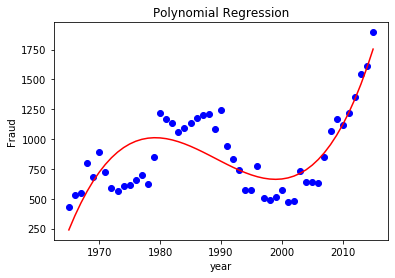

0.6484675711695179


In [99]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =6)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Fraud")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

This model is accurate around 64% which is average

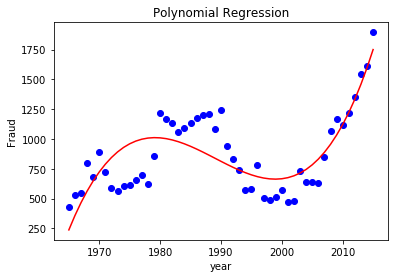

0.6461316853321573


In [100]:
#now changing the degree
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =5)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Fraud")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

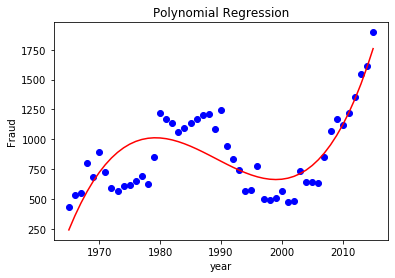

0.65077866636897


In [101]:
#again changing the degree
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =7)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Fraud")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

This model fits better than linear regression but does not fit very well.

### Conclusion:
The fraud cases are increasing at a very high rate.

### 12.Shop theft

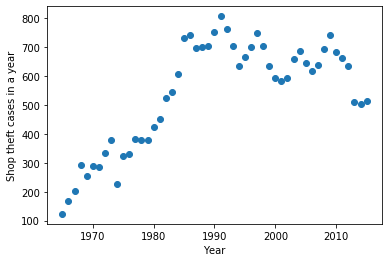

In [7]:
x= df[['Year']]
y = df[['shop.theft']]
plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Shop theft cases in a year')
plt.show()


### Linear regression

Testing data: 0.5640660627928928
Training data: 0.4879717961822341


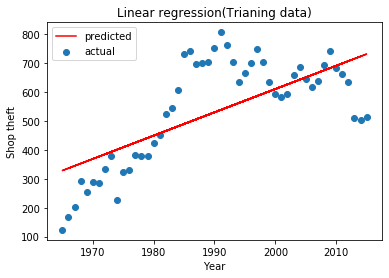

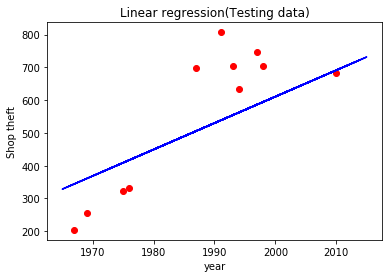

In [8]:
#using linear model to fit the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
a = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))
plt.scatter(x,y,label='actual')
plt.plot(x_train,reg.predict(x_train),c='red',label="predicted")
plt.title('Linear regression(Trianing data)')
plt.xlabel('Year')
plt.ylabel('Shop theft')
plt.legend()
plt.show()
#visualize the test data set
plt.scatter(x_test,y_test,c="r")#x_test = prediction,y_test = actual
plt.plot(x_train,reg.predict(x_train),c = 'b')
plt.title("Linear regression(Testing data)")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()




Accuracy = 56% for the testing data,
Average fitting model. 


### Polynomial Regression

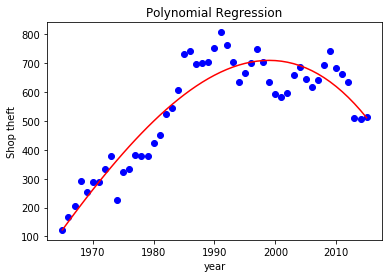

0.8566396074974664


In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =7)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

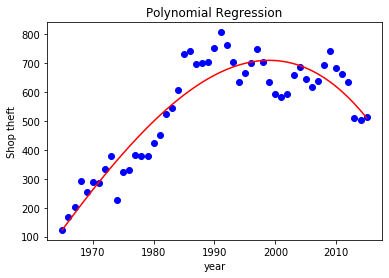

0.8567998209016205


In [105]:
#changing the degree to 5
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =5)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

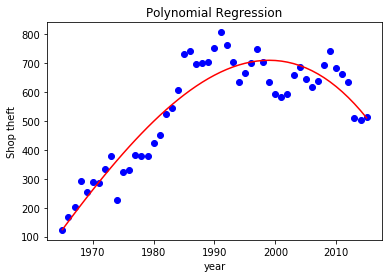

0.8568861312562461


In [106]:
#again changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =4)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

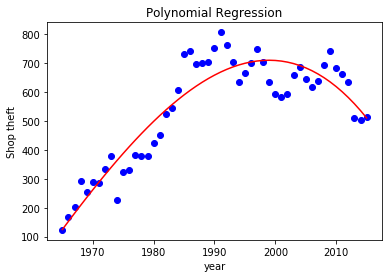

0.8569765428289724


In [107]:
#degree 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

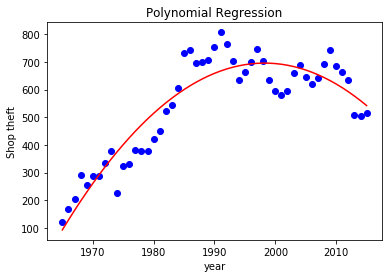

0.8516352547909598


In [108]:
#degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Shop theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

From comparing all the accuracy the polynomial model of degree 3 fits well

### Conclusion:
Shop thefts are decreasing

### 13.Robbery

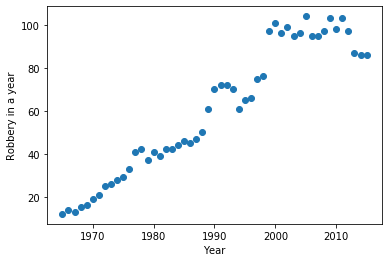

In [9]:
x = df[['Year']]
y = df[['robbery']]
#scatter plot of the data

plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Robbery in a year')
plt.show()


### Linear Regression

Testing data: 0.9668022109589115
Training data: 0.9076868195863215


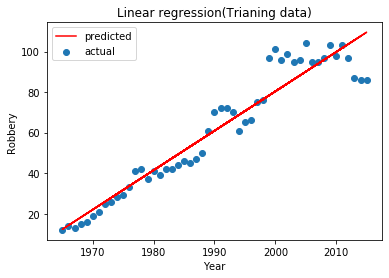

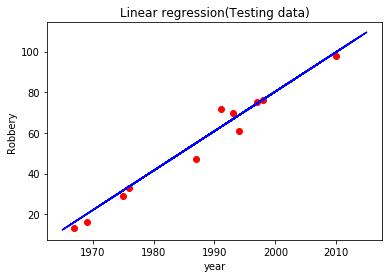

In [10]:
#using linear model to fit the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
a = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))
plt.scatter(x,y,label='actual')
plt.plot(x_train,reg.predict(x_train),c='red',label="predicted")
plt.title('Linear regression(Trianing data)')
plt.xlabel('Year')
plt.ylabel('Robbery')
plt.legend()
plt.show()
#visualize the test data set
plt.scatter(x_test,y_test,c="r")#x_test = prediction,y_test = actual
plt.plot(x_train,reg.predict(x_train),c = 'b')
plt.title("Linear regression(Testing data)")
plt.xlabel("year")
plt.ylabel("Robbery")
plt.show()




Well fit model 

### Polynomial regression analysis

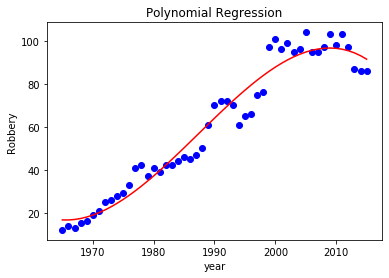

0.9563748702523032


In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =4)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Robbery")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

Very high accuracy , good model.Accuracy is very high.

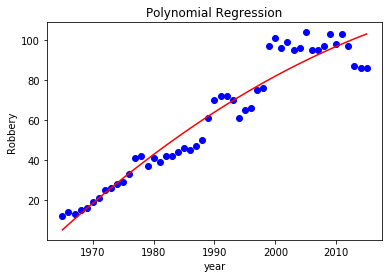

0.9294795370938034


In [112]:
#changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Robbery")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

On decreasing the degree than 4 accureracy decreases

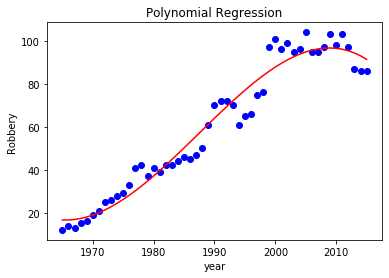

0.9565544192151066


In [113]:
#degree 5
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =5)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Robbery")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

So polynomial regression is a good model for this data

### Conclusion:
The robbery cases are coming under control

### 14.Other penal crimes

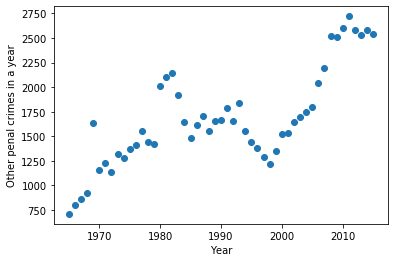

In [114]:
x = df[['Year']]
y = df[['other.penal.crimes']]

plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Other penal crimes in a year')
plt.show()


### `Linear regression Analysis

0.5813552895393853


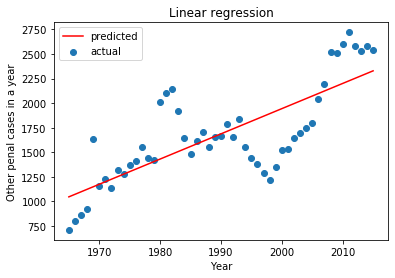

In [115]:
#using linear model to fit the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
a = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))
plt.scatter(x,y,label='actual')
plt.plot(x_train,reg.predict(x_train),c='red',label="predicted")
plt.title('Linear regression(Trianing data)')
plt.xlabel('Year')
plt.ylabel('Drink and drive')
plt.legend()
plt.show()
#visualize the test data set
plt.scatter(x_test,y_test,c="r")#x_test = prediction,y_test = actual
plt.plot(x_train,reg.predict(x_train),c = 'b')
plt.title("Linear regression(Testing data)")
plt.xlabel("year")
plt.ylabel("Drink and drive")
plt.show()


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
a = reg.predict(x)
print(reg.score(x,y))

plt.scatter(x,y,label='actual')
plt.plot(x,a,c='red',label="predicted")
plt.title('Linear regression')
plt.xlabel('Year')
plt.ylabel('Other penal cases in a year')
plt.legend()
plt.show()

Average fitting model with accuracy around 78%

### Polynomial regression

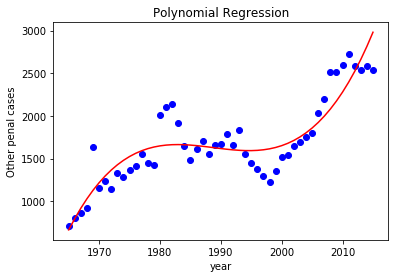

0.7954696861504693


In [116]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Other penal cases")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

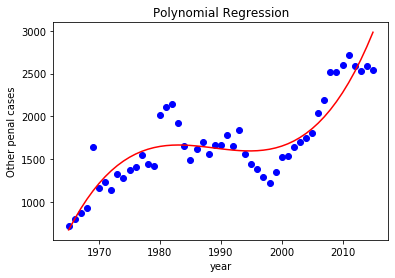

0.7948877424832939


In [117]:
# changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =5)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Other penal cases")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

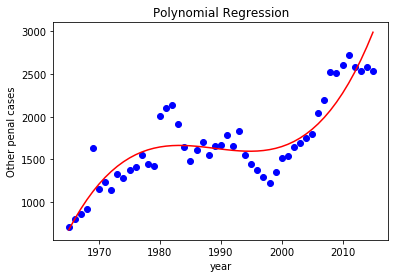

0.7942487610428208


In [118]:
# again changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =7)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Other penal cases")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

Polynomial regression model of degree 3 fits well.

### conclusion:
These crimes are increasing rapidly.

### 15.Out of vehicle theft

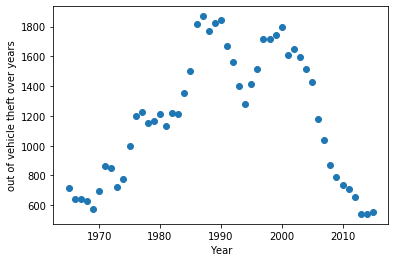

In [11]:
x = df[['Year']]
y = df[['out.of.vehicle.theft']]

plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('out of vehicle theft over years')
plt.show()


### Linear regression

Testing data: 0.019613273820622612
Training data: 0.007519802115821372


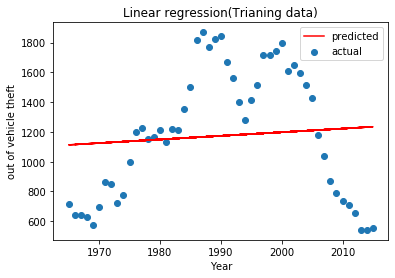

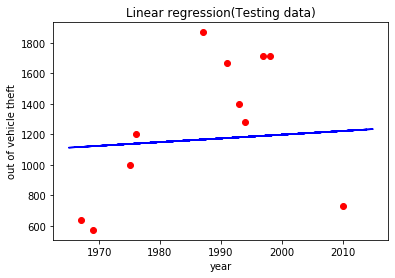

In [12]:
#using linear model to fit the data
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
a = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))
plt.scatter(x,y,label='actual')
plt.plot(x_train,reg.predict(x_train),c='red',label="predicted")
plt.title('Linear regression(Trianing data)')
plt.xlabel('Year')
plt.ylabel('out of vehicle theft')
plt.legend()
plt.show()
#visualize the test data set
plt.scatter(x_test,y_test,c="r")#x_test = prediction,y_test = actual
plt.plot(x_train,reg.predict(x_train),c = 'b')
plt.title("Linear regression(Testing data)")
plt.xlabel("year")
plt.ylabel("out of vehicle theft")
plt.show()



Linear regression does not fit at all.

### Polynomial Regression

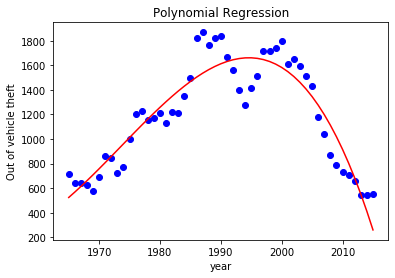

0.8554885783979004


In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =7)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Out of vehicle theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

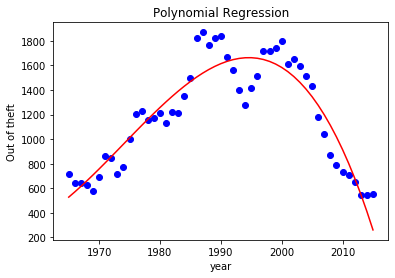

0.8560425828108579


In [122]:
#changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =5)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Out of theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

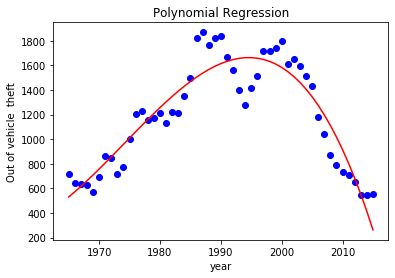

0.8563234866530323


In [123]:
#again changing the degree
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =4)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Out of vehicle  theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

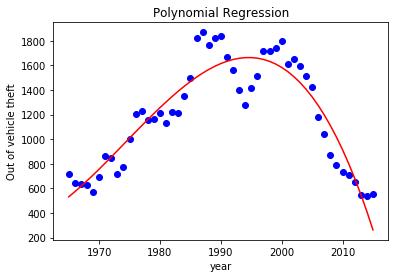

0.856606760220021


In [124]:
#degree =3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Out of vehicle theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

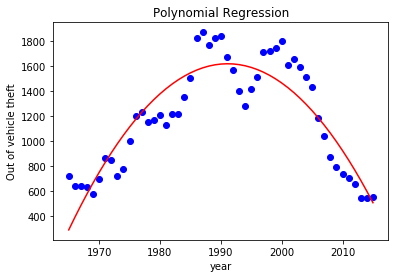

0.7983023780307186


In [125]:
#degree = 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Out of vehicle theft")
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print(r2)

### Polynomial model of degree 3 fits well with an accuracy of 85%

### Conclusion:
The out of vehicle theft is decreasing.

### Overall conclusion from the entire analysis:



The crimes can be divided into 3 groups:


1.Crimes that are under control

2.Crimes that are shockingly growing.

3.Crimes that are constantly growing.

### Crimes that are under control
1.Stealing General

2.Burglary

3.House Theft

4.Shop Theft

5.Vehicle Theft

6.Out of vehicle theft

7.Robbery


### Crimes that are constantly growing:
1.Murder

2.Assaults

3.Rape

4.Total number of crimes



### Crimes that are shockingly growing:
1.Sexual offenses

2.Fraud

3.Narcotics

4.Drunk Driving

5.Other penal crimes